In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("../resources/MY2022 Fuel Consumption Ratings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [64]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [65]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


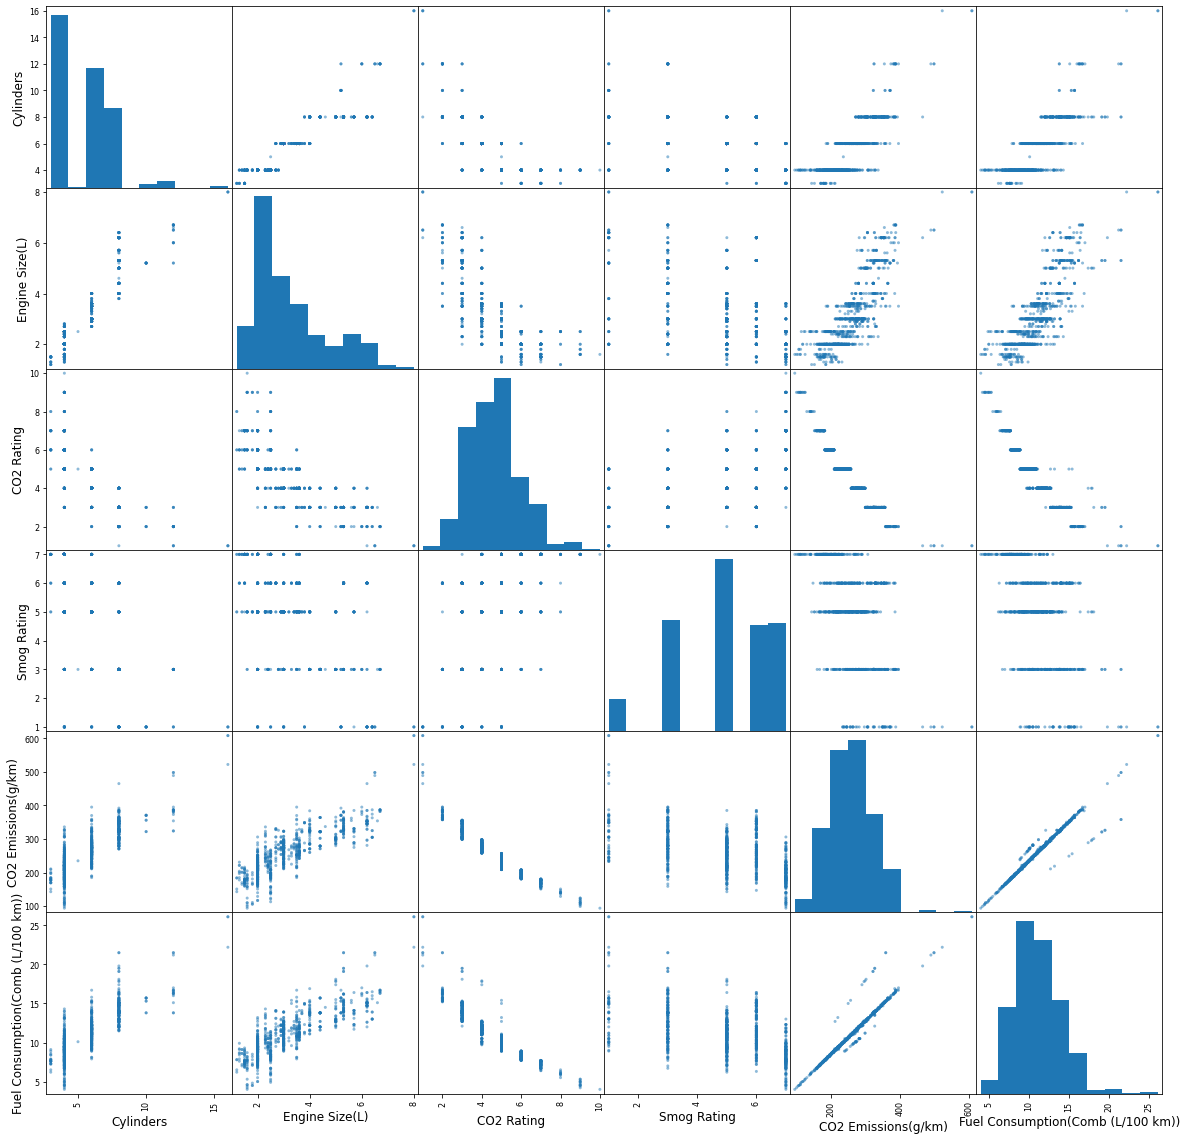

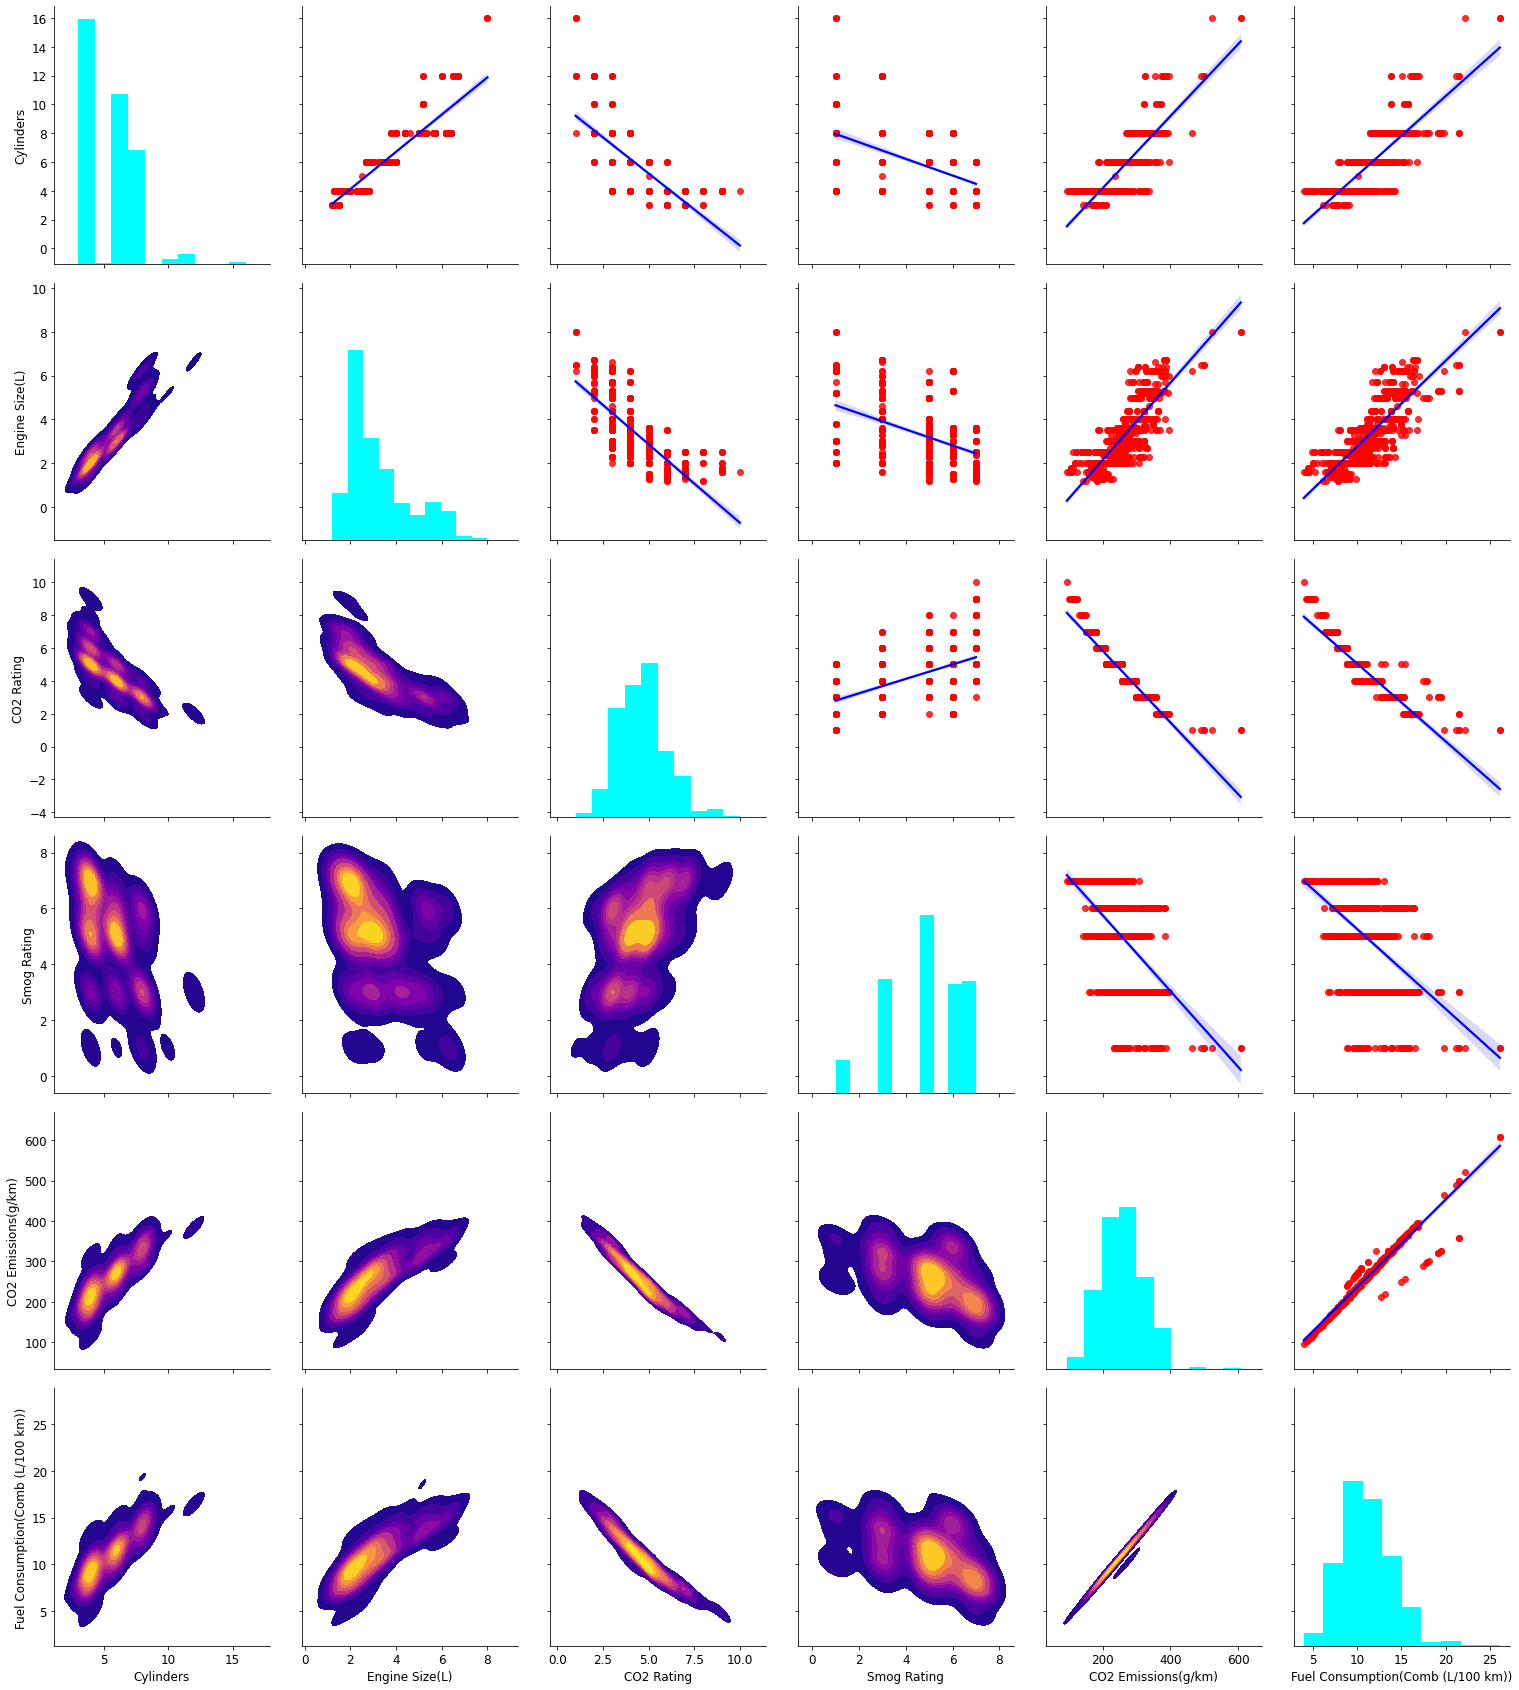

In [66]:
from pandas.plotting import scatter_matrix
plt.rc('font', size=12)
scatter_matrix(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], figsize=(20, 20))
g = sns.PairGrid(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], height=4, aspect=0.9)
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.kdeplot, cmap="plasma", shade=True, thresh=0.05)
g.map_diag(plt.hist,color = 'cyan')

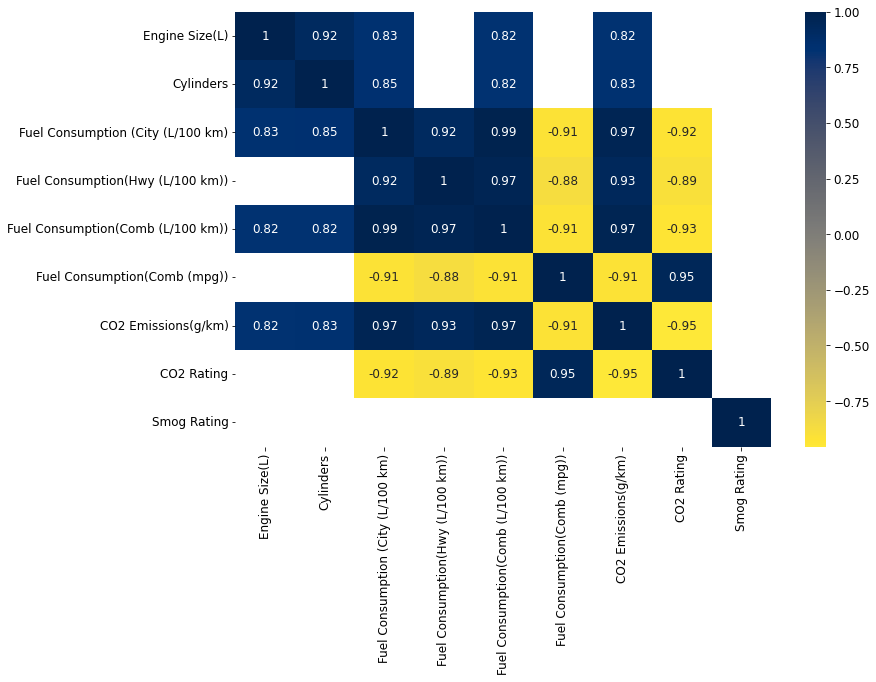

In [67]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

In the data processing process, the model year, fuel usage (city, highway, mpg), model name, and smog rating are excluded because they are unused features.

In [68]:
df_sort = df[df.columns.drop(['Model Year','Fuel Consumption (City (L/100 km)', 
            'Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))', 'Model', 'Smog Rating'])]
            
df_sort.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating
0,Acura,Compact,2.4,4,AM8,Z,8.6,200,6
1,Acura,SUV: Small,3.5,6,AS10,Z,11.2,263,4
2,Acura,SUV: Small,2.0,4,AS10,Z,9.9,232,5
3,Acura,SUV: Small,2.0,4,AS10,Z,10.3,242,5
4,Acura,Compact,2.0,4,AS10,Z,9.8,230,5


Use the OrdinalEncoder to encode the brand name, car class, fuel type, and transmission numerically. 
Since the data are object types, the OrdinalEncoder operates similarly to the label encoder in the data processing process, but the method is adopted because it is used effectively in a two-dimensional array.
* Warning occurs because the error in the bottom result affects the conversion of existing data while copying. However, in the case of the preprocessing, it is okay to ignore the warning because the original is also modified. Therefore, the result of output after the encoding process is the dataframe after classification.

In [69]:
z = df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
z_res = pd.DataFrame(z)
df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res
df_sort

C:\Users\User\AppData\Local\Temp\ipykernel_12756\226076172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sort[['Make','Vehicle Class', 'Transmission', 'Fuel Type']] = z_res


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating
0,0.0,0.0,2.4,4,7.0,3.0,8.6,200,6
1,0.0,7.0,3.5,6,8.0,3.0,11.2,263,4
2,0.0,7.0,2.0,4,8.0,3.0,9.9,232,5
3,0.0,7.0,2.0,4,8.0,3.0,10.3,242,5
4,0.0,0.0,2.0,4,8.0,3.0,9.8,230,5
...,...,...,...,...,...,...,...,...,...
941,38.0,7.0,2.0,4,12.0,3.0,9.4,219,5
942,38.0,7.0,2.0,4,12.0,3.0,9.4,219,5
943,38.0,7.0,2.0,4,12.0,3.0,9.9,232,5
944,38.0,8.0,2.0,4,12.0,3.0,10.1,236,5


Data are divided into feature data, encoding data, and targets.

In [70]:
df_num = df_sort[['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))']]
df_cat = df_sort[['Make', 'Vehicle Class', 'Fuel Type', 'Transmission']]
df_rate = df_sort[['CO2 Emissions(g/km)', 'CO2 Rating']]
df_rate

,CO2 Emissions(g/km),CO2 Rating
0,200,6
1,263,4
2,232,5
3,242,5
4,230,5
...,...,...
941,219,5
942,219,5
943,232,5
944,236,5


Normalization is carried out using StandardScaler. This is because it is easy to respond to outliers and is commonly used data.

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
df_scaled = scaler.transform(df_num)
df_scaled_df = pd.DataFrame(df_scaled, columns=['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))'])
df_scaled_df

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km))
0,-0.581281,-0.863551,-0.866881
1,0.219250,0.171835,0.037543
2,-0.872384,-0.863551,-0.414669
3,-0.872384,-0.863551,-0.275527
4,-0.872384,-0.863551,-0.449455
...,...,...,...
941,-0.872384,-0.863551,-0.588597
942,-0.872384,-0.863551,-0.588597
943,-0.872384,-0.863551,-0.414669
944,-0.872384,-0.863551,-0.345098


In [72]:
df_result_sum = pd.concat([df_scaled_df, df_cat], axis = 1)
df_result_sum.loc[[10,11,12],:]

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Make,Vehicle Class,Fuel Type,Transmission
10,-0.217404,0.171835,0.176686,1.0,2.0,3.0,3.0
11,-0.872384,-0.863551,-0.623382,1.0,7.0,3.0,3.0
12,-0.872384,-0.863551,-0.519026,1.0,7.0,3.0,3.0


In the area, about train and test x train y, of the overall column train that CO2, 02 rating c emissions (km and g) as divided into two case.
Train_1 represents data on c02 ratin, and train_2 represents data on CO2 Emissions (g/km).

In [73]:
from sklearn.model_selection import train_test_split
target_co2 = df_rate.pop('CO2 Rating')
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_result_sum, target_co2, 
                                                            test_size = 0.2, random_state = 0)

target_smog = df_rate.pop('CO2 Emissions(g/km)')
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_result_sum, target_smog, 
                                                            test_size = 0.2, random_state = 0)

In [74]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)
X_train_1

(756, 7)
(756,)
(190, 7)
(190,)
(756, 7)
(756,)
(190, 7)
(190,)


,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Make,Vehicle Class,Fuel Type,Transmission
79,0.874230,1.207220,0.315828,4.0,1.0,3.0,12.0
687,-0.144628,0.171835,-0.240741,29.0,8.0,3.0,4.0
181,2.184190,1.207220,1.324609,9.0,12.0,3.0,21.0
744,-1.163486,-0.863551,-1.527807,31.0,0.0,2.0,14.0
215,1.529210,1.207220,1.150682,9.0,6.0,2.0,0.0
...,...,...,...,...,...,...,...
835,1.820312,1.207220,0.907183,33.0,6.0,2.0,3.0
192,-1.236261,-0.863551,-0.797310,9.0,7.0,2.0,1.0
629,0.437577,1.207220,1.324609,27.0,1.0,3.0,3.0
559,1.456434,2.242605,1.602894,22.0,13.0,3.0,6.0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Reference of KNN algorithm: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [76]:
feature_names = ['Engine Size(L)', 'Cylinders', 
                 'Fuel Consumption(Comb (L/100 km))', 'Vehicle Class', 'Fuel Type', 'Transmission'] # X variable
X_names = df_result_sum[feature_names] # set col names (scaled)
Y_names = df['CO2 Rating'] # label to predit

Set target feature to be predicted and get the scaled data.

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_names, Y_names, random_state = 0) #split train & test

Split data as train & test

In [78]:
neighbor = pow(len(X_train), 0.5)
neighbor = int(neighbor)
print("n_neighbor: {0}".format(neighbor))
knn = KNeighborsClassifier(n_neighbors = neighbor)
knn.fit(X_train, Y_train)

n_neighbor: 26


KNeighborsClassifier(n_neighbors=26)

Set paramater(k) using n^(1/2).

Fitting data to use KNN.

In [79]:
print("Accurancy of KNN classifier -> Training set : {:.2f}".format(knn.score(X_train, Y_train)))

print("Accurancy of KNN classifier -> Test set : {:.2f}".format(knn.score(X_test, Y_test)))

Accurancy of KNN classifier -> Training set : 0.57
Accurancy of KNN classifier -> Test set : 0.53


Check performance of the training & test set. (Accurancy of KNN classifier)

In [80]:
# Predicton
example_car = [[2.0, 4, 9.4, 219, 38, 7.0]]
scale_data = []
non_scale_data = []
for i in range(3):
    scale_data.append(example_car[0][i])
for i in range(3):
    non_scale_data.append(example_car[0][i+3])
    

scale_data = [scale_data]
non_scale_data = [non_scale_data]

scaler.fit(scale_data)
example_car_scaled = scaler.transform(scale_data)
predict = np.concatenate([example_car_scaled, non_scale_data], axis = 1)


print("Predicted CO2 Rating for Example", example_car, " = ", knn.predict(predict))

Predicted CO2 Rating for Example [[2.0, 4, 9.4, 219, 38, 7.0]]  =  [5]


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Devide the input data(example) into scale·non_scale data.

Example data normalization is carried out using StandardScaler.

Get the predicted value from KNN

---10 k fold accuracy---
Cross-validation accuracy : [0.6        0.56842105 0.56842105 0.6        0.52631579 0.53684211
 0.5        0.4787234  0.5        0.53191489]

평균 검증 정확도 : 0.541


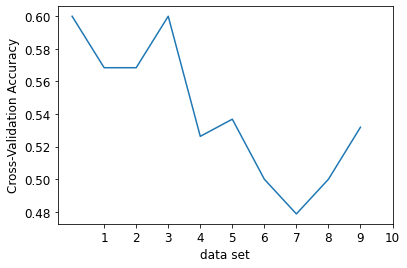

In [55]:
# import library
from sklearn.model_selection import KFold # k fold
from sklearn.model_selection import cross_val_score  # k fold Api

#knn = KNeighborsClassifier(n_neighbors = 30) # n^(1/2)
features = df_result_sum[feature_names] # set col names (scaled)
target_co2_rating = df['CO2 Rating'] # label to predit

kfold = KFold(n_splits=10, shuffle=True ,random_state=0)
scores = cross_val_score(knn,features,target_co2,cv=kfold,scoring = "accuracy")    # 10-fold cross-validation

print("---10 k fold accuracy---")
print("Cross-validation accuracy : " + '{}'.format(scores))
print("\n평균 검증 정확도 : " + '{:.3f}'.format(scores.mean()))

x = np.arange(0, 10)

plt.plot(x, scores)
plt.xlabel('data set')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(np.arange(1, 11))
plt.show()


k neighbors에 따른 평균검증정확도( k = 1 ~ 60 홀수)
[knn n_neighbors = 1 ]0.815
[knn n_neighbors = 3 ]0.728
[knn n_neighbors = 5 ]0.672
[knn n_neighbors = 7 ]0.663
[knn n_neighbors = 9 ]0.635
[knn n_neighbors = 11 ]0.617
[knn n_neighbors = 13 ]0.599
[knn n_neighbors = 15 ]0.582
[knn n_neighbors = 17 ]0.570
[knn n_neighbors = 19 ]0.550
[knn n_neighbors = 21 ]0.546
[knn n_neighbors = 23 ]0.550
[knn n_neighbors = 25 ]0.542
[knn n_neighbors = 27 ]0.530
[knn n_neighbors = 29 ]0.526
[knn n_neighbors = 31 ]0.508
[knn n_neighbors = 33 ]0.498
[knn n_neighbors = 35 ]0.490
[knn n_neighbors = 37 ]0.494
[knn n_neighbors = 39 ]0.496
[knn n_neighbors = 41 ]0.496
[knn n_neighbors = 43 ]0.490
[knn n_neighbors = 45 ]0.478
[knn n_neighbors = 47 ]0.478
[knn n_neighbors = 49 ]0.479
[knn n_neighbors = 51 ]0.482
[knn n_neighbors = 53 ]0.486
[knn n_neighbors = 55 ]0.483
[knn n_neighbors = 57 ]0.481
[knn n_neighbors = 59 ]0.472


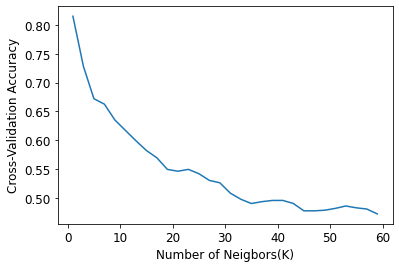

In [56]:
# import library
from sklearn.model_selection import KFold # k fold
from sklearn.model_selection import cross_val_score  # k fold Api


k_range = range(1,60,2)              # k를 1~60까지의 홀수 k(n_neighbors)
k_scores = []                        # 각 k들의 성능을 비교하기 위한 리스트생성.
kfold = KFold(n_splits=10, shuffle=True ,random_state=0)

print("k neighbors에 따른 평균검증정확도( k = 1 ~ 60 홀수)")
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,features,target_co2,cv=kfold,scoring = "accuracy")    # 10-fold cross-validation
    print("[knn n_neighbors = " + str(k)+ ' ]' + '{:.3f}'.format(scores.mean()))
    k_scores.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산 
    

plt.plot(k_range, k_scores)
plt.xlabel('Number of Neigbors(K)')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

The decision tree algorithm is added to the existing knn algorithm to predict the result with the voting algorithm and return the accuracy.
(Code Reference: https://techblog-history-younghunjo1.tistory.com/102)

In [58]:
def get_score_of_voting(depth):
    tree = DecisionTreeClassifier(max_depth=depth)
    voting = VotingClassifier(estimators=[('KNN', knn), ('tree', tree)], voting='soft')
    voting.fit(X_train, Y_train)
    pred = voting.predict(X_test)
    return accuracy_score(Y_test, pred)

Using the Voting algorithm, setting the max_depth of the tree from 1 to 9 to have the maximum accuracy will have an accuracy of around 95%.
In conclusion, when knn was turned alone, the accuracy increased by more than 40%p from 52%.

In [59]:
max_score = 0
max_depth = 0
for depth in range(1, 10):
    score= get_score_of_voting(depth)
    if score > max_score:
        max_score = score
        max_depth = depth

print("The depth with the maximum score is {0}".format(max_depth))
print("Voting accuracy with knn and decision tree: {0:.2f}".format(max_score))

The depth with the maximum score is 6
Voting accuracy with knn and decision tree: 0.96
